In [1]:
import sys
from pathlib import Path

sys.path.append(Path(".").parent.resolve().as_posix())

import numpy as np
from jesse import helpers, research
from jesse import indicators

warmup_1m, trading_1m = research.get_candles(
    "Binance Perpetual Futures",
    "BTC-USDT",
    "1m",
    helpers.date_to_timestamp("2024-12-01"),
    helpers.date_to_timestamp("2024-12-31"),
    warmup_candles_num=0,
    caching=False,
    is_for_jesse=False,
)

In [2]:
from research_tools import TrailingStopLabel

trailing_stop_label = TrailingStopLabel(trading_1m, n_bar=15, min_r=0)
trailing_stop_label.labels.shape

(43200,)

In [3]:
trading_1m.shape

(43200, 6)

In [4]:
np.unique(trailing_stop_label.labels, return_counts=True)

(array([-1,  0,  1], dtype=int8), array([ 5062, 33187,  4951]))

In [5]:
np.unique(trailing_stop_label.bar_duration, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 array([33187,  2574,  2239,  1546,  1055,   807,   505,   374,   266,
          193,   123,    86,    87,    63,    45,    33,    17]))

In [6]:
real_r = np.abs(trailing_stop_label.realized_r)
real_r = real_r[real_r > 0]
real_r.min()

1.929014206369928e-06

In [8]:
real_r.max()

0.03726179184271805

In [9]:
0.00025 - 1.929010485235416e-06

0.0002480709895147646

In [59]:
ema_atr = (
    indicators.ema(indicators.atr(trading_1m, sequential=True), sequential=True)
    / trading_1m[:, 2]
    * 100
)
ema_atr

array([       nan,        nan,        nan, ..., 0.0756055 , 0.07455653,
       0.07340089])

In [60]:
ema_atr[~np.isnan(ema_atr)].max()

0.853970503325764

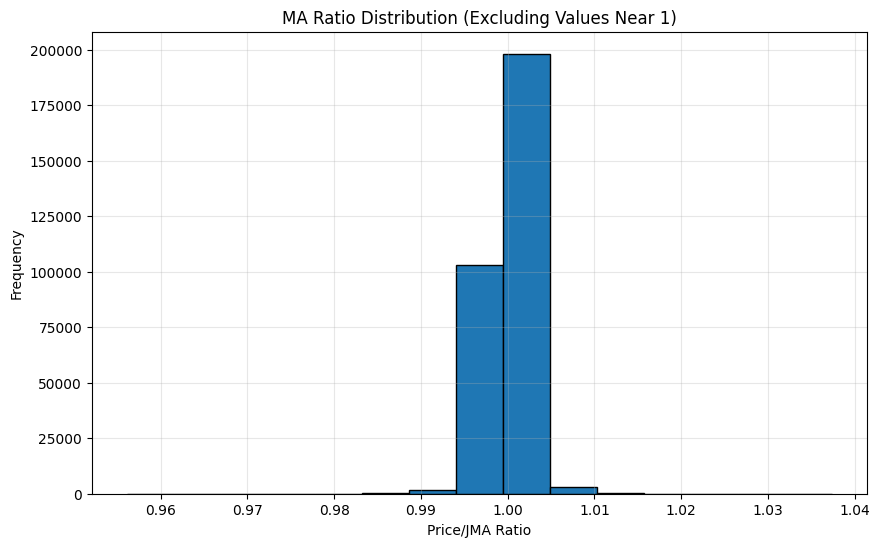

In [22]:
ma_ratio = helpers.get_candle_source(trading_candles, "close") / kama
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# 过滤掉接近1的值以便更好地观察其他比例
# filtered_ratio = ma_ratio[(ma_ratio < 0.999) | (ma_ratio > 1.001)]

plt.hist(ma_ratio, bins=15, edgecolor="black")
plt.title("MA Ratio Distribution (Excluding Values Near 1)")
plt.xlabel("Price/JMA Ratio")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show()

In [2]:
# timestamp, open, close, high, low, volume
buy_count, sell_count = td_sequential(
    trading_candles, sequential=True, aggressive=True, stealth_actions=True
)

In [4]:
np.unique(buy_count, return_counts=True)

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14.]),
 array([11722,  1178,  1106,  1111,  1093,  1125,  1057,   940,   866,
          838,   736,   729,   704,  8455, 11540]))